In [6]:
%matplotlib inline
import parse
import pandas as pd

In [129]:
import seaborn
import matplotlib.pyplot as plt

In [3]:
data = sorted(line.strip() for line in open('input.txt'))

In [239]:
data[:20]

['[1518-02-22 23:59] Guard #1319 begins shift',
 '[1518-02-23 00:15] falls asleep',
 '[1518-02-23 00:51] wakes up',
 '[1518-02-24 00:00] Guard #691 begins shift',
 '[1518-02-24 00:12] falls asleep',
 '[1518-02-24 00:27] wakes up',
 '[1518-02-24 00:40] falls asleep',
 '[1518-02-24 00:49] wakes up',
 '[1518-02-25 00:01] Guard #2503 begins shift',
 '[1518-02-25 00:32] falls asleep',
 '[1518-02-25 00:56] wakes up',
 '[1518-02-26 00:00] Guard #691 begins shift',
 '[1518-02-26 00:14] falls asleep',
 '[1518-02-26 00:25] wakes up',
 '[1518-02-26 00:33] falls asleep',
 '[1518-02-26 00:49] wakes up',
 '[1518-02-26 00:55] falls asleep',
 '[1518-02-26 00:57] wakes up',
 '[1518-02-26 23:46] Guard #797 begins shift',
 '[1518-02-27 00:01] falls asleep']

To get the timedeltas, add 1 hour, them subtract the current day + 1 hour (sneaky).

In [275]:
guard_id = None
entries = []

for row in data:
    r = parse.parse('[{timestamp:ti}] Guard #{guard_id:d} begins shift', row)
    if r: # returns None if nothing happens
        guard_id = r['guard_id']
        r.named['asleep'] = False
        #entries.append(r.named)
    else:  # toggling status - assumes no possible overlaps
        r = parse.search('[{timestamp:ti}]', row)
        asleep = row.endswith('falls asleep')
        r.named.update({
            'guard_id': guard_id,
            'asleep': asleep
        })
    # as a bonus, pandas is built to support 64 bit timestamps, so you could use a period
    # r.named['timestamp'] = pd.Period(r['timestamp'], freq='T')
    # or replace the year
    r.named['timestamp'] = r['timestamp'].replace(year=r['timestamp'].year + 500)
    entries.append(r.named)

In [276]:
entries = pd.DataFrame(entries)

In [277]:
dt = entries['timestamp']

In [278]:
entries['day'] = (dt + pd.Timedelta(hours=1)).dt.floor('D')

In [279]:
entries['offset'] = dt + pd.Timedelta(hours=1) - (dt + pd.Timedelta(hours=1)).dt.floor('D') - pd.Timedelta(hours=1)

In [308]:
entries.groupby(['guard_id', 'day', 'offset'])['asleep'].first().unstack(['guard_id', 'day'])

guard_id                163                                               \
day               2018-03-10 2018-04-09 2018-04-10 2018-04-23 2018-05-01   
offset                                                                     
-1 days +23:46:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:47:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:48:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:49:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:50:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:51:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:52:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:53:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:54:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:56:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:57:00        NaN        NaN        NaN        NaN        NaN   
-1 days +23:58:00        NaN      False        NaN        NaN      False   
-1 days +23:59:00        NaN        NaN        NaN        NaN        NaN   
00:00:00                 NaN        NaN        NaN        NaN        NaN   
00:01:00                 NaN        NaN        NaN      False        NaN   
00:02:00                 NaN        NaN      False        NaN        NaN   
00:03:00               False        NaN        NaN        NaN        NaN   
00:04:00                 NaN        NaN        NaN        NaN        NaN   
00:05:00                 NaN        NaN        NaN        NaN        NaN   
00:06:00                 NaN        NaN        NaN        NaN        NaN   
00:07:00                 NaN        NaN        NaN        NaN        NaN   
00:08:00                 NaN        NaN        NaN        NaN        NaN   
00:09:00                 NaN        NaN        NaN        NaN        NaN   
00:10:00                 NaN        NaN        NaN        NaN       True   
00:11:00                 NaN        NaN        NaN        NaN        NaN   
00:12:00                 NaN        NaN        NaN        NaN        NaN   
00:13:00                 NaN        NaN        NaN        NaN        NaN   
00:14:00                 NaN        NaN        NaN        NaN        NaN   
00:15:00                 NaN        NaN        NaN        NaN        NaN   
00:16:00                 NaN        NaN        NaN        NaN        NaN   
...                      ...        ...        ...        ...        ...   
00:30:00                 NaN        NaN        NaN        NaN        NaN   
00:31:00                 NaN        NaN        NaN        NaN        NaN   
00:32:00                 NaN        NaN      False        NaN        NaN   
00:33:00                 NaN        NaN        NaN       True        NaN   
00:34:00                 NaN        NaN        NaN        NaN        NaN   
00:35:00                 NaN        NaN        NaN        NaN        NaN   
00:36:00                 NaN        NaN        NaN        NaN        NaN   
00:37:00                 NaN        NaN        NaN        NaN        NaN   
00:38:00                 NaN      False       True      False        NaN   
00:39:00                 NaN        NaN        NaN        NaN      False   
00:40:00                 NaN        NaN        NaN        NaN        NaN   
00:41:00                 NaN        NaN        NaN        NaN        NaN   
00:42:00                 NaN        NaN        NaN        NaN        NaN   
00:43:00                 NaN        NaN        NaN        NaN        NaN   
00:44:00                 NaN        NaN        NaN       True        NaN   
00:45:00                 NaN        NaN        NaN        NaN        NaN   
00:46:00                 NaN        NaN        NaN        NaN        NaN   
00:47:00                 NaN        NaN        NaN        NaN        NaN   
00:48:00                 NaN        NaN        N

In [280]:
shifts = entries.pivot_table(index='offset', columns=['guard_id', 'day'], values='asleep', aggfunc='first').ffill()

In [152]:
shifts2 = shifts.stack('day')

In [153]:
shifts2.index = shifts2.index.swaplevel()

In [154]:
shifts2.sort_index(inplace=True)

In [186]:
worst_guard = shifts2.sum().idxmax()

In [187]:
most_asleep = shifts2[worst_guard].unstack('offset').sum().idxmax()

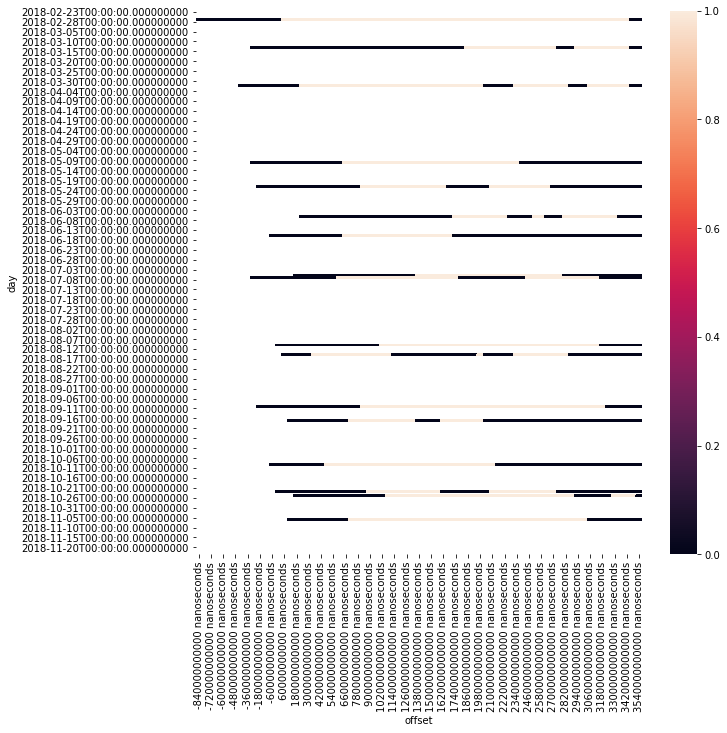

In [188]:
fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(
    shifts2[worst_guard].unstack('offset').astype('float')
)

## Part 2

In [295]:
filled_entries = shifts.reset_index().melt(id_vars=['offset'], value_name='asleep').dropna()

In [296]:
filled_entries.sample()

,offset,guard_id,day,asleep
13065,00:58:00,1783,2018-06-15,False


In [303]:
worst_guard, worst_time = filled_entries.groupby(['guard_id', 'offset'])['asleep'].sum().astype(int).idxmax()

In [304]:
worst_guard * worst_time.seconds / 60

5705.0

In [298]:
filled_entries.pivot_table(index='offset', columns='guard_id', values='asleep', aggfunc='sum').max().idxm

guard_id
163     16.0
383     10.0
431      9.0
521      7.0
547     13.0
577     11.0
607      8.0
691     13.0
797     14.0
1289     5.0
1319    15.0
1531     9.0
1693     0.0
1783    11.0
2143     5.0
2503    11.0
2647    10.0
2699     8.0
2741     7.0
2801     0.0
2803     0.0
2843    10.0
3359     4.0
dtype: float64

In [227]:
shifts.astype('float').T.sum().max()

160.0

In [232]:
entries.groupby(['guard_id', 'offset'])

In [190]:
int(worst_guard * most_asleep.seconds / 60)

14346

In [212]:
times_asleep = entries.pivot_table(index='offset', columns='guard_id', values='asleep', aggfunc='sum').ffill()

In [213]:
times_asleep

guard_id,163,383,431,521,547,577,607,691,797,1289,...,1783,2143,2503,2647,2699,2741,2801,2803,2843,3359
offset,,,,,,,,,,,,,,,,,,,,,
-1 days +23:46:00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0
-1 days +23:47:00,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0
-1 days +23:48:00,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
-1 days +23:49:00,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
-1 days +23:50:00,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
-1 days +23:51:00,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
-1 days +23:52:00,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
-1 days +23:53:00,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
-1 days +23:54:00,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0


In [214]:
worst_guard = times_asleep.max().idxmax()

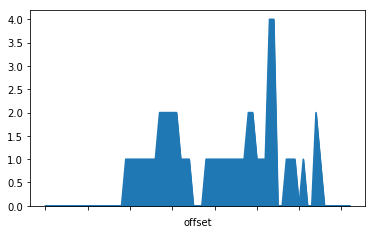

In [219]:
times_asleep[worst_guard].plot(kind='area')

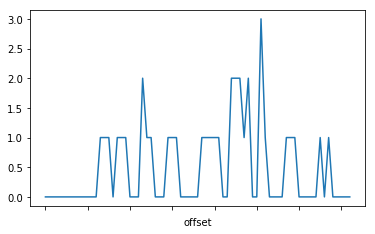

In [217]:
times_asleep[163].plot()

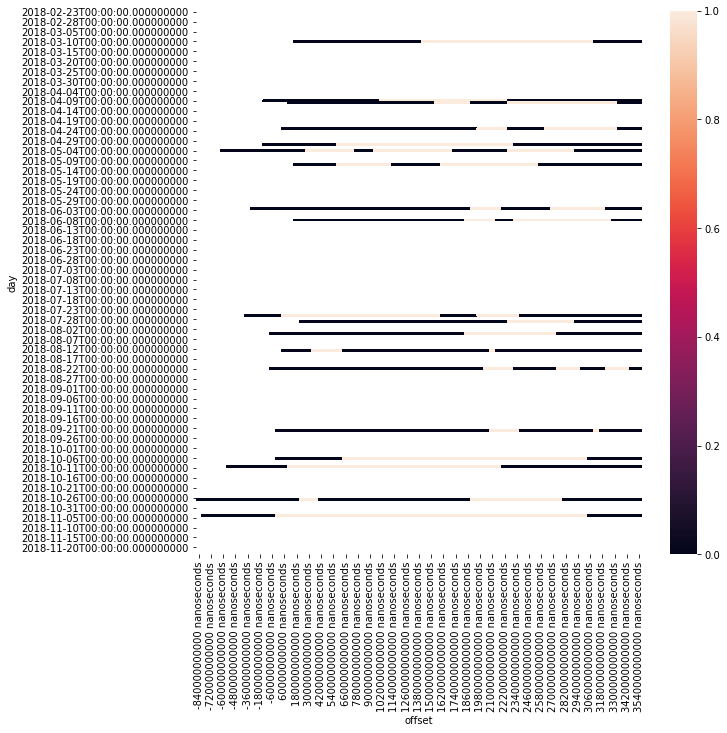

In [220]:
fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(
    shifts2[163].unstack('offset').astype('float')
)

In [195]:
times_asleep[worst_guard].idxmax().seconds / 60 * worst_guard

8529.0

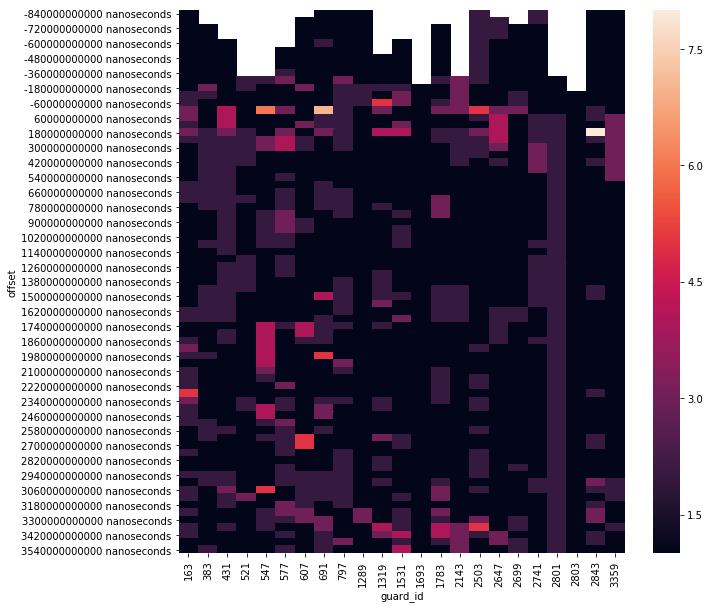

In [196]:
fig, ax = plt.subplots(figsize=(10, 10))
seaborn.heatmap(
    times_asleep
)

In [204]:
import collections

In [208]:
import dateutil.parser

In [209]:
guards = collections.defaultdict(list)
times = collections.defaultdict(int)

for line in data:
    time, action = line.split('] ')

    time = dateutil.parser.parse(time[1:])

    if action.startswith('Guard'):
        guard = int(action.split()[1][1:])
    elif action == 'falls asleep':
        start = time
    elif action == 'wakes up':
        end = time
        guards[guard].append((start.minute, end.minute))
        times[guard] += (end - start).seconds

(guard, time) = max(times.items(), key=lambda i: i[1])
(minute, count) = max([
    (minute, sum(1 for start, end in guards[guard] if start <= minute < end))
for minute in range(60)], key=lambda i: i[1])

print('part 1:', guard * minute)

(guard, minute, count) = max([
    (guard, minute, sum(1 for start, end in guards[guard] if start <= minute < end))
for minute in range(60) for guard in guards], key=lambda i: i[2])

print('part 2:', guard * minute)

part 1: 14346
part 2: 5705


In [210]:
guard

163

In [211]:
minute

35

In [221]:
count

16